In the last file, we used a data set on U.S. income from the 1994 census; we'll continue using it here. It contains information on **marital status**, **age**, **type of work**, and more. The target column, `high_income`, indicates a **salary less than or equal to 50k per year (`0`)**, or **more than 50k per year (`1`)**.

In the last file, we learned about the basics of decision trees, including **entropy** and **information gain**. In this file, we'll build on those concepts to construct a full decision tree in Python and use it make predictions.

We'll use the [ID3 Algorithm](https://en.wikipedia.org/wiki/ID3_algorithm) for constructing decision trees to accomplish this. This algorithm involves [recursion](https://en.wikipedia.org/wiki/Recursion_(computer_science)) and an understanding of time complexity.

In general, recursion is the process of splitting a large problem into smaller chunks. Recursive functions will call themselves, then combine the results into a final output.

Building a tree is a perfect use case for recursive algorithms. At each node, we'll call a recursive function that will split the data into two branches. Each branch will lead to a node, and the function will call itself to build the tree out.

We've created a pseudocode version of the full ID3 Algorithm below. Pseudocode is a plain-text outline of a piece of code that explains how it works. Exploring the pseudocode for an algorithm is a good way to understand it better before trying to code it.

We've made a minor modification to the algorithm so that it only creates two branches from each node. This will simplify the process of constructing the tree, and make it easier to demonstrate the principles it involves.

The recursive nature of the algorithm comes into play on `line 10`. Every node in the tree will call the `id3()` function, and the final tree will be the result of all of these calls.

Let's make ID3 easier to follow by walking through an example with a dummy data set. We want to predict `high_income` using `age` and `marital_status`. 
* In the `marital_status` column, `0` means **unmarried**, `1` means **married**, and `2` means **divorced**.

* We start with our algorithm: There are both `0s` and `1s` in `high_income`, so we skip lines 2 and 3. 
* We jump to line 4. We won't go through the **information gain** calculations here, but the column we split on is `age`.
* On line 5, we find the **median**, which is `37.5`.
* On line 6, we make everything less than or equal to the median `0`, and anything greater than the median `1`. 
* Next, we start the loop on line 7.Because we're going through the possible values for **A** in order, we hit the `0` values first. 
* We make a branch going to the left for rows of data where `age <= 37.5`.
* We reach line 10, and call `id3()` on the new node at the end of that branch. We **pause** this current execution of `id3()` because we called the function again. We'll call this `paused state Node 1`.

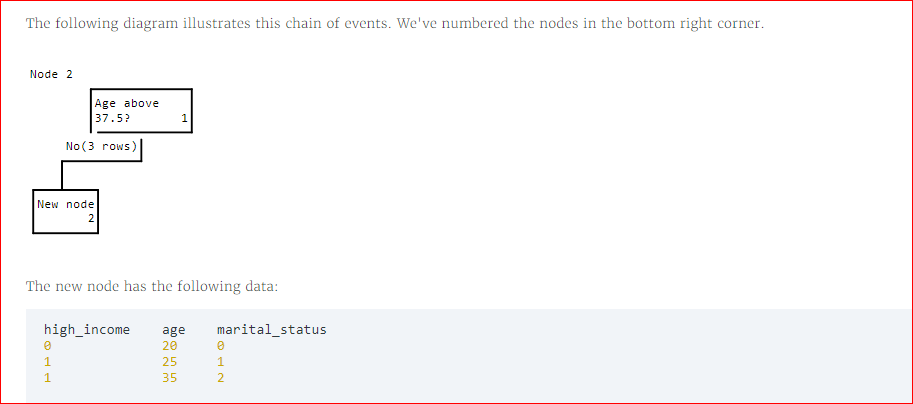

Because we recursively called the `id3()` function on line 10, we start over at the top, with only the post-split data. We skip lines 2 and 3 again, and find another variable to split on. `age` is again the best split variable, with a median of `25`. We make a branch to the left where `age <= 25`.

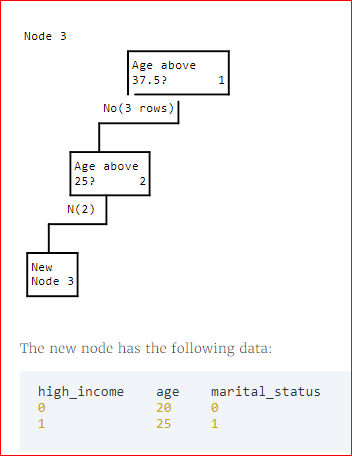

We'll hit line 10 again, and **pause** node 2 to start over in the `id3()` function. We find that the best column to split on is again `age`, and the median is `22.5`.

We perform another split:

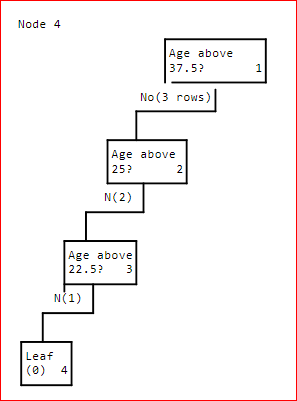

All of the values for `high_income` in **node 4** are `0`. This means that line 3 applies, and we don't continue building the tree lower. This causes the `id3` function for **node 4** to return. This **unpauses** the `id3()` function for **node 3**, which then moves on to building the right side of the tree. 

Line 7 specifies that we're in a for loop. When the `id3()` algorithm for **node 4** returns, **node 3** goes to the next iteration in the for loop, which is the right branch.

We're now on **node 5**, which is the right side of the split we make from **node 3**. This calls the `id3()` function for **node 5**, which stops at `line 2` and returns. There's only one row in this split, and we end up with a **leaf node** again, where the label is `1`.

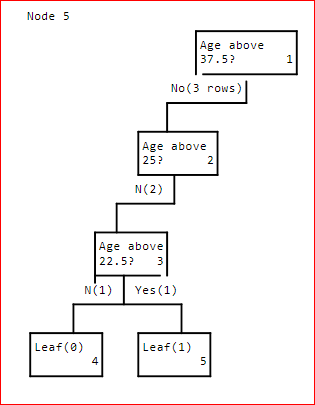

We're done with the entire loop for **node 3**. We've constructed a left-hand subtree and a right-hand subtree, both of which end in **terminal leaves** having only one value for the target column.

The `id3()` function for **node 3** now hits `line 11` and returns. This **unpauses node 2**, where we construct the right split. There's only one row here -- the `35` year old. This again creates a **leaf node**, which will have the label `1`.

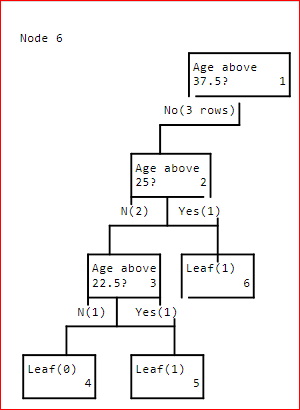

This causes **node 2** to finish processing and return on line 11. This causes **node 1** to **unpause** and start building the right side of the tree.

We won't build out the entire right side of the tree right now. Instead, we'll dive into some code that will construct trees automatically.

In [3]:
import pandas as pd
import numpy as np

# Set index_col to False to avoid pandas thinking that the first column is row indexes (it's age)
income = pd.read_csv("income.csv", index_col = False) # by defaul index_col is False
income.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col = pd.Categorical(income["workclass"])
income["workclass"] = col.codes

In [5]:
# Convert the rest of the categorical columns in income to numeric columns.

cols = ["education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "high_income"]

for i in cols:
    income[i] = pd.Categorical(income[i]).codes

In [6]:
income[cols].head()

,education,marital_status,occupation,relationship,race,sex,native_country,high_income
0,9,4,1,1,4,1,39,0
1,9,2,4,0,4,1,39,0
2,11,0,6,1,4,1,39,0
3,1,2,6,0,2,1,39,0
4,9,2,10,5,2,0,5,0


In the last file, we wrote functions to calculate **entropy** and **information gain**.

Now we need a function that returns the name of the column we should use to split a data set. The function should take the name of the data set, the target column, and a list of columns we might want to split on as input.

In [7]:
def calc_entropy(column):
    import numpy as np
    import math
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts/len(column)
    
    # Initialize the entropy to 0
    entropy =  0
     # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            entropy += prob*math.log(prob,2)
    return - entropy



In [8]:
def calc_information_gain(data, col, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    # Find the median of the column we're splitting
    column = data[col]
    median = column.median()
    
    # Make two subsets of the data, based on the median
    left_split = data[column <= median]
    right_split = data[column > median]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [9]:
# function that returns the name of a column to split the data on. 

columns = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex",
           "hours_per_week", "native_country"]

def find_best_column(data,target_name, columns):
    information_gains = []
    for col in columns:
        information_gain = calc_information_gain(data,col, target_name)
        information_gains.append(information_gain)
    highest_gain_index = information_gains.index(max(information_gains))
    highest_gain = columns[highest_gain_index]
    return highest_gain


In [10]:
income_split = find_best_column(income,"high_income", columns)
print(income_split)

marital_status


This version is very similar to the algorithm above, but lines 2 and 3 are different. Rather than storing the entire tree (which is a bit complicated), we'll just tally how many leaves end up with the label `1`, and how many end up with the label `0`.

In [11]:
# We'll use lists to store our labels for nodes (when we find them)
# Lists can be accessed inside our recursive function, whereas integers can't. 

label_1s = []
label_0s = []

def id3(data, target, columns):
    unique_targets = data[target].unique()
    if len(unique_targets) == 1: 
        if 0 in unique_targets: # lines 2 and 3 in the pseudocode
            label_0s.append(0)
        elif 1 in unique_targets:
            label_1s.append(1)
            
        return # Returning here is critical -- if we don't, the recursive tree will never finish, and run forever
    
    best_column = find_best_column(data, target, columns)
    column_median = data[best_column].median()
    split_left = data[data[best_column] <= column_median]
    split_right = data[data[best_column] > column_median]
    
    for split in [split_left, split_right]:
        # Call id3 recursively to process each branch
        id3(split, target, columns)
    


In [12]:
data = pd.DataFrame([
    [0,20,0],
    [0,60,2],
    [0,40,1],
    [1,25,1],
    [1,35,2],
    [1,55,1]
    ])
data.columns = ["high_income", "age", "marital_status"]

In [13]:
id3(data,"high_income",["age","marital_status"])

In [14]:
print(label_1s) 
print(label_0s)

[1, 1, 1]
[0, 0, 0]


Now we can store the entire tree, rather than the leaf labels only. We'll use nested dictionaries to do this. We can represent the root node with a dictionary, and branches with the keys `left` and `right`. We'll store the column we're splitting on as the key column, and the median value as the key median. Finally, we can store the label for a leaf as the key label. We'll also number each node as we go along using the number key.

Under this approach, we're now passing the tree dictionary into our `id3` function and setting some keys on it. One complexity is in how we're creating the nested dictionary. For the left split, we're adding a key to the tree dictionary that looks like this:

`tree["left"] = {}`

For the right side, we're adding:

`tree["right"] = {}`

Now that we've added this key, we're able to pass our new dictionary into the recursive call to `id3()`. While this new dictionary will be the dictionary for that specific node, it will be tied back to the parent dictionary (because it's a key of the original dictionary).

This process will continue building up the nested dictionary. We'll be able to access the entire dictionary using the variable tree we define before the function. Think of each recursive call as building a piece of the tree, which we can then access after all of the functions have terminated.

In [15]:
tree = {}
nodes = []

def id3(data,target,columns, tree):
    unique_targets = pd.unique(data[target])
    nodes.append(len(nodes)+1)
    tree["number"] = nodes[-1]
    if len(unique_targets) == 1:
        if 0 in unique_targets:
            tree["label"] = 0
        elif 1 in unique_targets:
            tree["label"] = 1
        return
    
    best_column = find_best_column(data, target, columns)
    column_median = data[best_column].median()
    
    tree["column"] = best_column
    tree["median"] = column_median
    
    left_split = data[data[best_column] <= column_median]
    right_split = data[data[best_column] > column_median]
    
    split_dict = {"left":left_split,"right":right_split}
    
    for name, split in split_dict.items():
        tree[name] = {}
        id3(split,target,columns, tree[name])

In [16]:
id3(data, "high_income", ["age", "marital_status"], tree) 

In [17]:
print(nodes)
tree

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


{'number': 1,
 'column': 'age',
 'median': 37.5,
 'left': {'number': 2,
  'column': 'age',
  'median': 25.0,
  'left': {'number': 3,
   'column': 'age',
   'median': 22.5,
   'left': {'number': 4, 'label': 0},
   'right': {'number': 5, 'label': 1}},
  'right': {'number': 6, 'label': 1}},
 'right': {'number': 7,
  'column': 'age',
  'median': 55.0,
  'left': {'number': 8,
   'column': 'age',
   'median': 47.5,
   'left': {'number': 9, 'label': 0},
   'right': {'number': 10, 'label': 1}},
  'right': {'number': 11, 'label': 0}}}

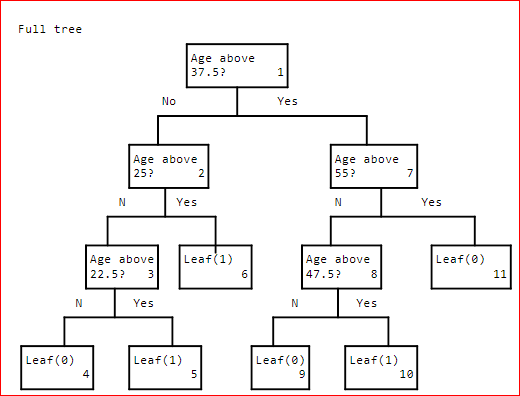

The tree dictionary shows all of the relevant information, but it doesn't look very nice. We can fix its appearance by printing it out in a nicer format.

To do this, we'll need to recursively iterate through our tree dictionary. Any dictionary that has a label key is a leaf. Whenever we find one, we'll print out the label. Otherwise, we'll loop through the tree's left and right keys and recursively call the same function.

We also need to keep track of a depth variable. This variable will allow us to use indentation to indicate the order of the nodes. Before we print anything out, we'll prefix it with the number of spaces corresponding to the depth variable.

In [20]:
def print_with_depth(string, depth):
    # Add space before a string
    prefix = "    " * depth
    print("{0}{1}".format(prefix,string))

def print_node(tree, depth):
    if "label" in tree:
        # If found, then this is a leaf, so print it and return
        string  = "Leaf : Label {0}". format(tree["label"])
        print_with_depth(string, depth)
        return # This is critical -- without it, we'll get infinite recursion
    
    #  print information about what the node is splitting on
    string = "{0} > {1}".format(tree["column"], tree["median"])
    
    print_with_depth(string, depth)
    for branch in [tree["left"], tree["right"]]:
        print_node(branch, depth+1)

In [21]:
print_node(tree, 0)

age > 37.5
    age > 25.0
        age > 22.5
            Leaf : Label 0
            Leaf : Label 1
        Leaf : Label 1
    age > 55.0
        age > 47.5
            Leaf : Label 0
            Leaf : Label 1
        Leaf : Label 0


* First, we'd split on `age > 37.5` and go to the right.
* Then, we'd split on `age > 55.0` and go to the left. 
* Then, we'd split on `age > 47.5` and go to the right. 
* We'd end up predicting a `1` for `high_income`.

Making predictions with such a small tree is fairly straightforward, but what if we want to use the entire income dataframe? We wouldn't be able to eyeball predictions; we'd want an automated way to do this instead.

Let's write a function that makes predictions automatically. All we need to do is follow the split points we've already defined with a new row.

Here's the pseudocode:

The major difference here is that we're returning values. Because we're only calling the function recursively once in each iteration (we only go **down** a single branch), we can return a single value up the chain of recursion. This will let us get a value back when we call the function.

In [19]:
def predict(tree, row):
    if "label" in tree:
        return tree["label"]
    column = tree["column"]
    median = tree["median"]
    
    if row[column] <= median:
        return predict(tree["left"], row)
    else:
        return predict(tree["right"], row)
        

In [20]:
print(predict(tree, data.iloc[0]))
print()
# checking for age at 1st row
print(data.iloc[0]["age"])

0

20


Now that we can make a prediction for a single row, we can write a function that makes predictions for multiple rows simultanously.

In [107]:
def batch_predict(tree,df):
    return df.apply(lambda x: predict(tree,x), axis = 1)

In [108]:
new_data = pd.DataFrame([
    [40,0],
    [20,2],
    [80,1],
    [15,1],
    [27,2],
    [38,1]
    ])
# Assign column names to the data
new_data.columns = ["age", "marital_status"]

In [109]:
predictions = batch_predict(tree,new_data)

In [110]:
predictions

0    0
1    0
2    0
3    0
4    1
5    0
dtype: int64

In this project, we learned how to create a full decision tree model, print the results, and use the tree to make predictions. We applied a modified version of the `ID3` algorithm on a small data set for clarity.